# Activity 4: My First Autoencoder
### Activity from chapter 4 of the book Generative Adversarial Networks, by David Foster

In [14]:
# Import statements
import os
from utils.loaders import load_mnist
from models.AE import Autoencoder

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

In [2]:
# Parameters
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    
MODE = 'build' # Or load (check class)

In [16]:
# Load the data
(x_train, y_train), (x_test, y_test) = load_mnist()

In [4]:
# Define structure of the NN
AE = Autoencoder(
    input_dim=(28,28,1),
    encoder_conv_filters=[32,64,64,64],
    encoder_conv_kernel_size=[3,3,3,3],
    encoder_conv_strides=[1,2,2,1],
    decoder_conv_t_filters=[64,64,32,1],
    decoder_conv_t_kernel_size=[3,3,3,3],
    decoder_conv_t_strides=[1,2,2,1],
    z_dim=2
)
if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER), 'weights/weights.h5')

W0702 18:42:22.089625 4371379712 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 18:42:22.104386 4371379712 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 18:42:22.118622 4371379712 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [5]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [6]:
AE.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [7]:
# Train de autodecoder
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH=0

In [8]:
AE.compile(LEARNING_RATE)

W0702 18:43:27.032795 4371379712 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
AE.train(
    x_train[:1000],
    batch_size=BATCH_SIZE,
    epochs=200,
    run_folder=RUN_FOLDER,
    initial_epoch=INITIAL_EPOCH,
    print_every_n_batches=10
)

Epoch 1/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0512

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0510

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0506

Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0505

Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0501

Epoch 00005: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 6/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0499

Epoch 00006: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 7/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.049

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374

Epoch 00107: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 108/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374

Epoch 00108: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 109/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0375

Epoch 00109: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 110/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374

Epoch 00110: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 111/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374

Epoch 00111: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 112/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0371

Epoch 00112: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 113/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.037

Epoch 160/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0354

Epoch 00160: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 161/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0359

Epoch 00161: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 162/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0354

Epoch 00162: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 163/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0354

Epoch 00163: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 164/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0359

Epoch 00164: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 165/200
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0357

Epoch 00165: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 166/200
1000/1000 [==============================] - 1s 1ms/step

### Analysing the Autoencoder

In [12]:
### We can load the data if model has already been trained
from utils.loaders import load_model
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

AE = load_model(Autoencoder, RUN_FOLDER)

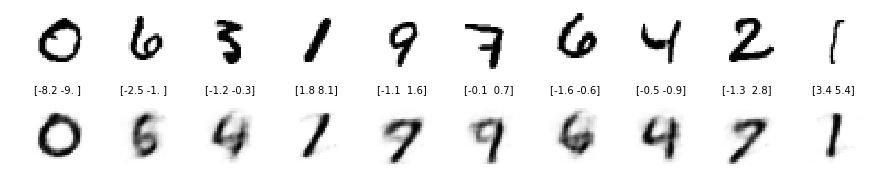

In [19]:
# Reconstructing original paintings
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
z_points = AE.encoder.predict(example_images)
reconst_images = AE.decoder.predict(z_points)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i], 1)), fontsize=10, ha='center',
            transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

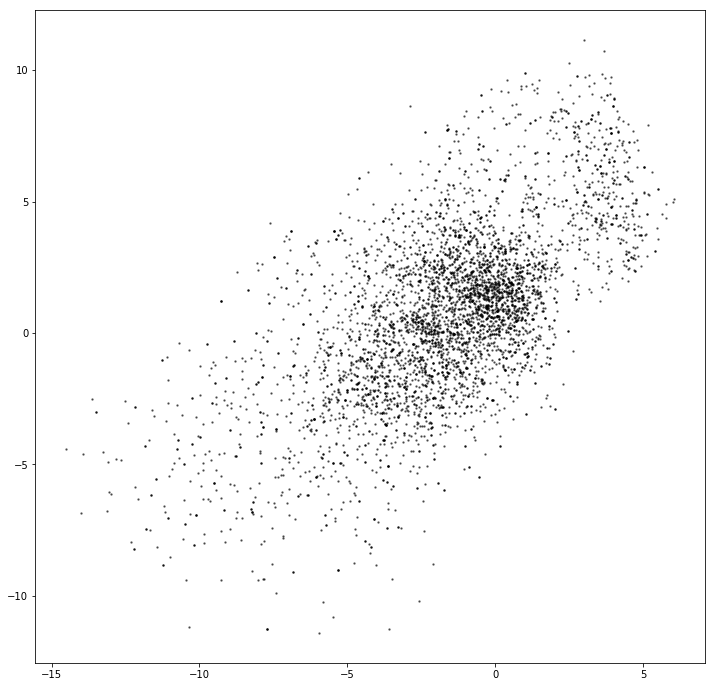

In [22]:
# Mr. N Coder's Wall
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]
z_points = AE.encoder.predict(example_images)
min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show() # Prints the latent space

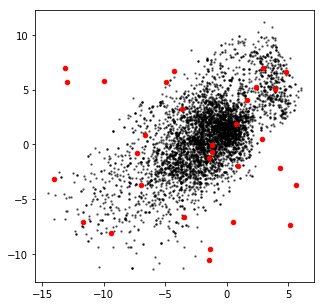

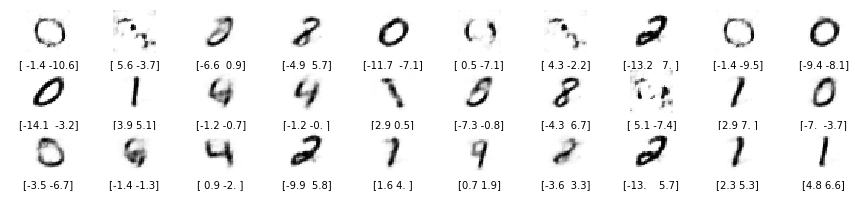

In [24]:
# The new generated art exhibition
figsize = 5
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], c='black', alpha=0.5, s=2)
grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size=grid_size*grid_depth)
y = np.random.uniform(min_y, max_y, size=grid_size*grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)
plt.scatter(z_grid[:, 0], z_grid[:, 1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i], 1)), fontsize=10, ha='center', 
           transform=ax.transAxes)
    ax.imshow(reconst[i, :, :, 0], cmap='Greys')

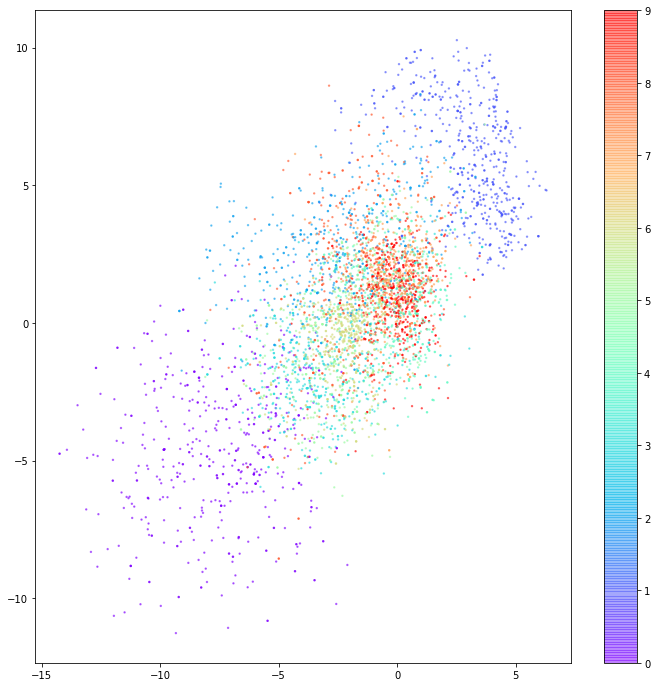

In [29]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]
z_points = AE.encoder.predict(example_images)
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', c=example_labels, 
           alpha=0.5, s=2)
plt.colorbar()
plt.show()

ValueError: Error when checking input: expected encoder_input to have 4 dimensions, but got array with shape (400, 2)

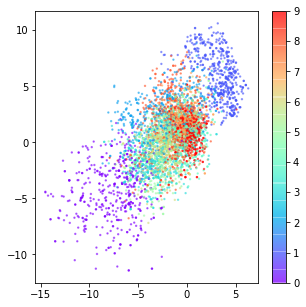

In [32]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5,5))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', 
            c=example_labels, alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))

x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.encoder.predict(z_grid)

plt.scatter(z_grid[:, 0], z_grid[:, 1], c='black', alpha=1, s=5)
plt.show()
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :, : , 0], cmap='Greys')